# Complete classification Example using HR data - Churn Prediction

__The Machine learning workflow__:
Remember, as data scientists we want a consistent process to getting great results. That’s where the machine learning workflow comes in.
There are five core steps:
-__Exploratory Analysis__ – First, “get to know” the data. This step should be quick, efficient, and decisive.
-__Data Cleaning__ – Then, clean your data to avoid many common pitfalls. Better data beats fancier algorithms.
-__Feature Engineering__ – Next, help your algorithms “focus” on what’s important by creating new features.
-__Algorithm Selection__ – Choose the best, most appropriate algorithms without wasting your time.
-__Model Training__ – Finally, train your models. This step is pretty formulaic once you’ve done the first four.

## Exploratory Analysis

Why: - Get to know the dataset
Time: - Should be quick, efficient and decisive
Questions to answer: - How many observations do I have? - How many features? - What are the data types of my features? Are they numeric? Categorical? - Do I have a target variable? - Correlations?

In [5]:
#Loading packages
import pandas as pd

In [6]:
#Import data
df = pd.read_csv(r"C:\Users\jg\code\templat_reg_and_class\data\HR_comma_sep.csv", skipinitialspace=True)
print(df.head())
print("Number of observations: ", df.shape[0])
print("Number of features: ", df.shape[1])

#Noticed white space in col Departments, change it here
df.columns = df.columns.str.replace(' ', '')

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Shape: (14999, 10)
-----------------
satisfaction_level --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
last_evaluation --> Type:num | Nas: 0(0%) | Min-Max: (0)-(1)
number_project --> Type:cat | Nas: 0(0%) | Categories: 6
average_montly_hours --> Type:num | Nas: 0(0%) | Min-Max: (96)-(310)
time_spend_company --> Type:cat | Nas: 0(0%) | Categories: 8
Work_accident --> Type:cat | Nas: 0(0%) | Categories: 2
left --> Type:cat | Nas: 0(0%) | Categories: 2
promotion_last_5years --> Type:cat | Nas: 0(0%) | Categories: 2
Departments --> Type:cat | Nas: 0(0%) | Categories: 10
salary --> Type:cat | Nas: 0(0%) | Categories: 3


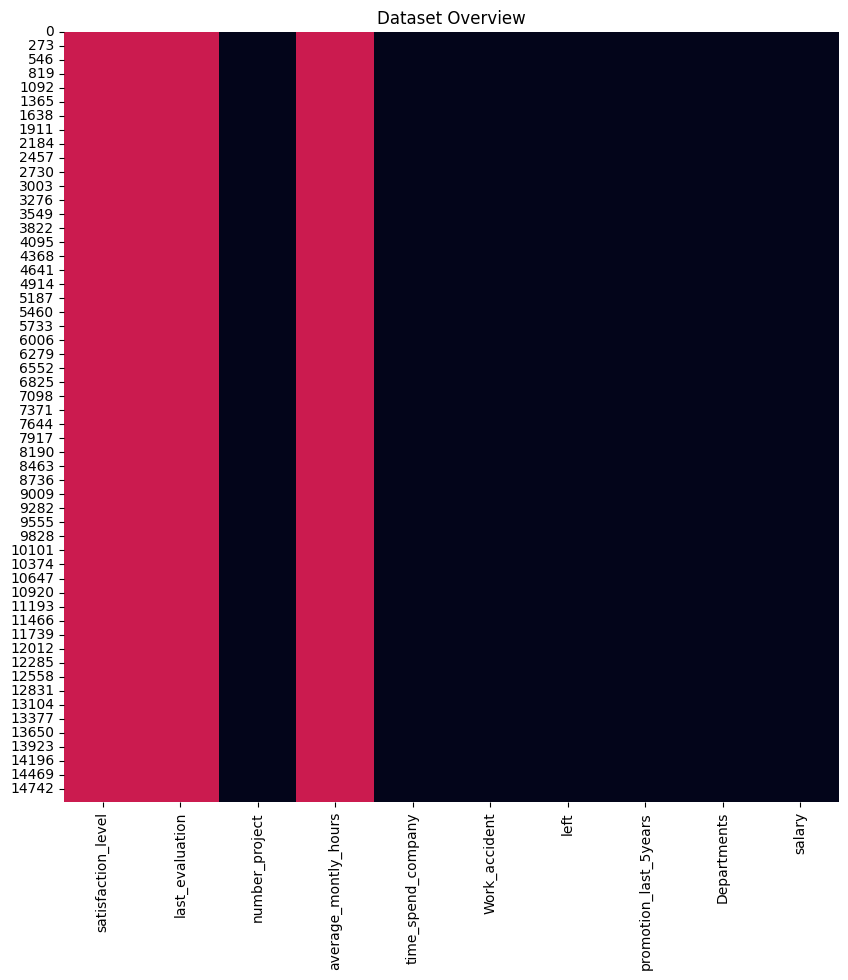

 Categerocial   Numerical/DateTime   NaN 


In [7]:
#Using function to find nans and num and catergorical variables in df
%load_ext autoreload
from functions import dtf_overview
%autoreload 2
dtf_overview(df, figsize=(10,10))

array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

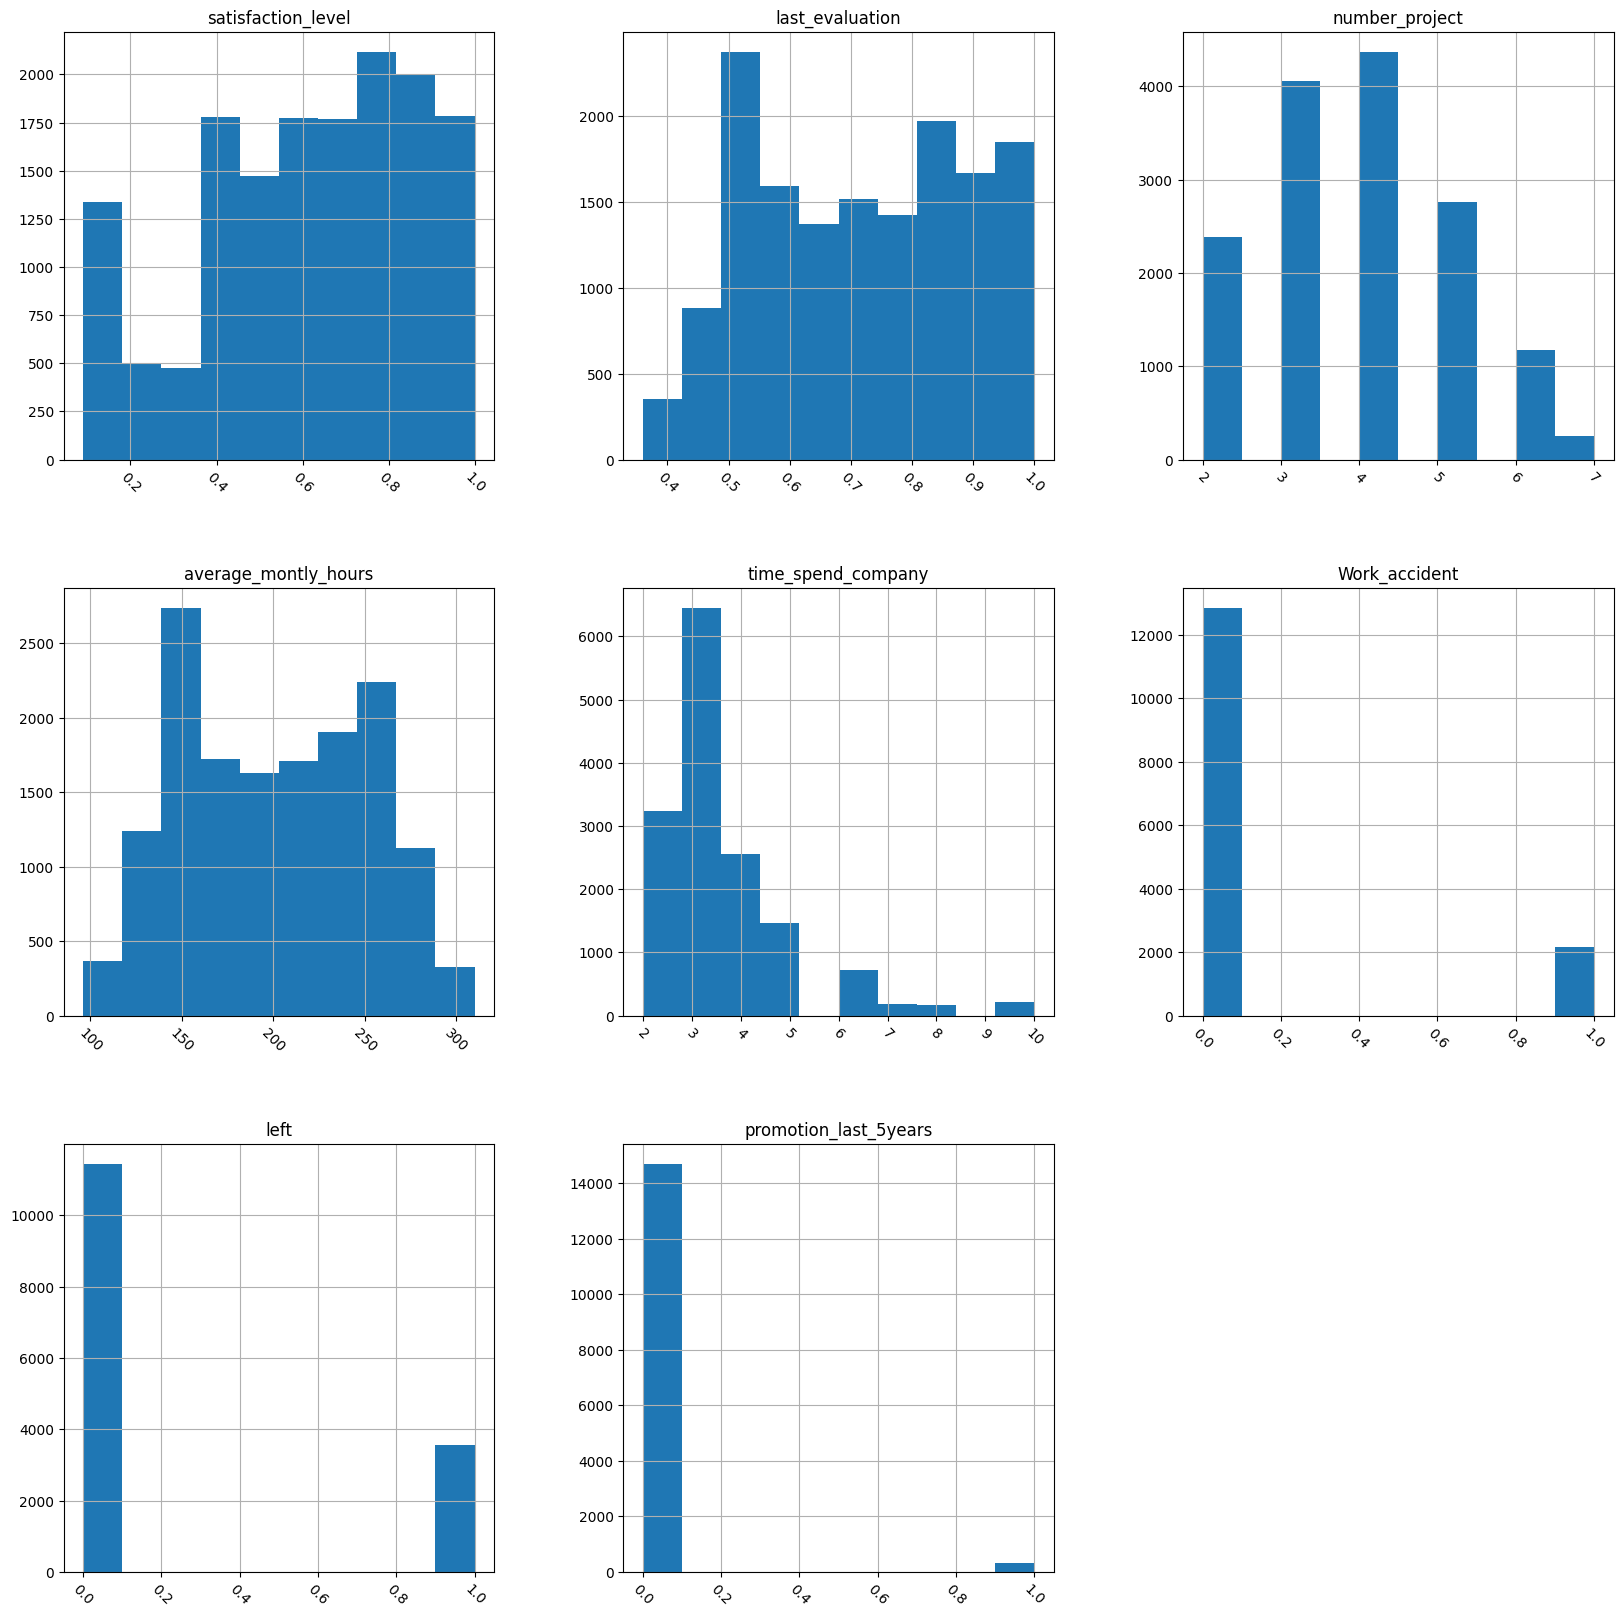

In [8]:
#Make histogram
df.hist(figsize=(20,20), xrot=-45)

NB! Here are a few things to look out for in a histogram:
- Distributions that are unexpected
- Potential outliers that don’t make sense
- Features that should be binary (i.e. “wannabe indicator variables”)
- Boundaries that don’t make sense
- Potential measurement errors

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


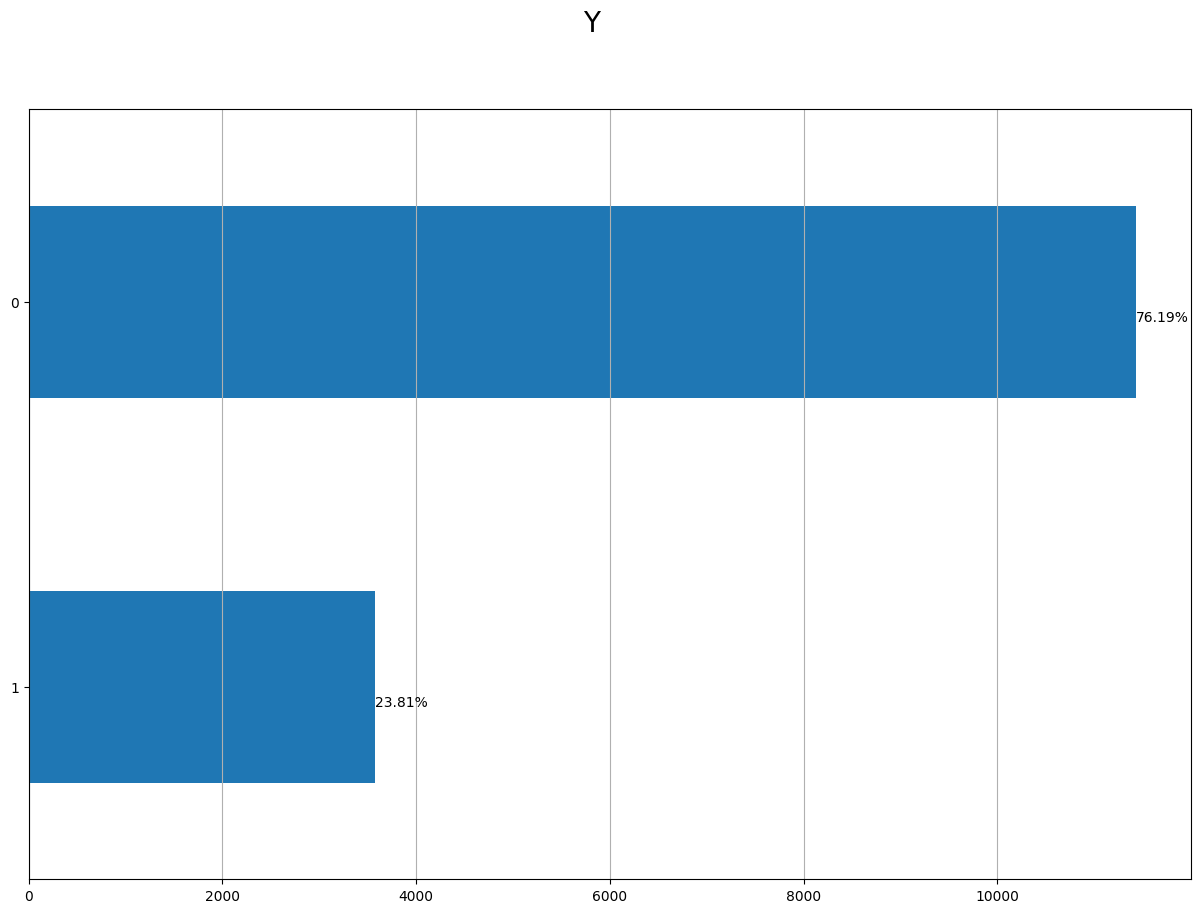

In [9]:
#Get the distribution of left

#Rename "left" variable to Y
df = df.rename(columns={"left":"Y"})

#Plot Y
%load_ext autoreload
from functions import freqdist_plot
%autoreload 2
freqdist_plot(dtf = df, x = "Y", box_logscale=True, figsize=(15,10), quantile_breaks=(0,10))

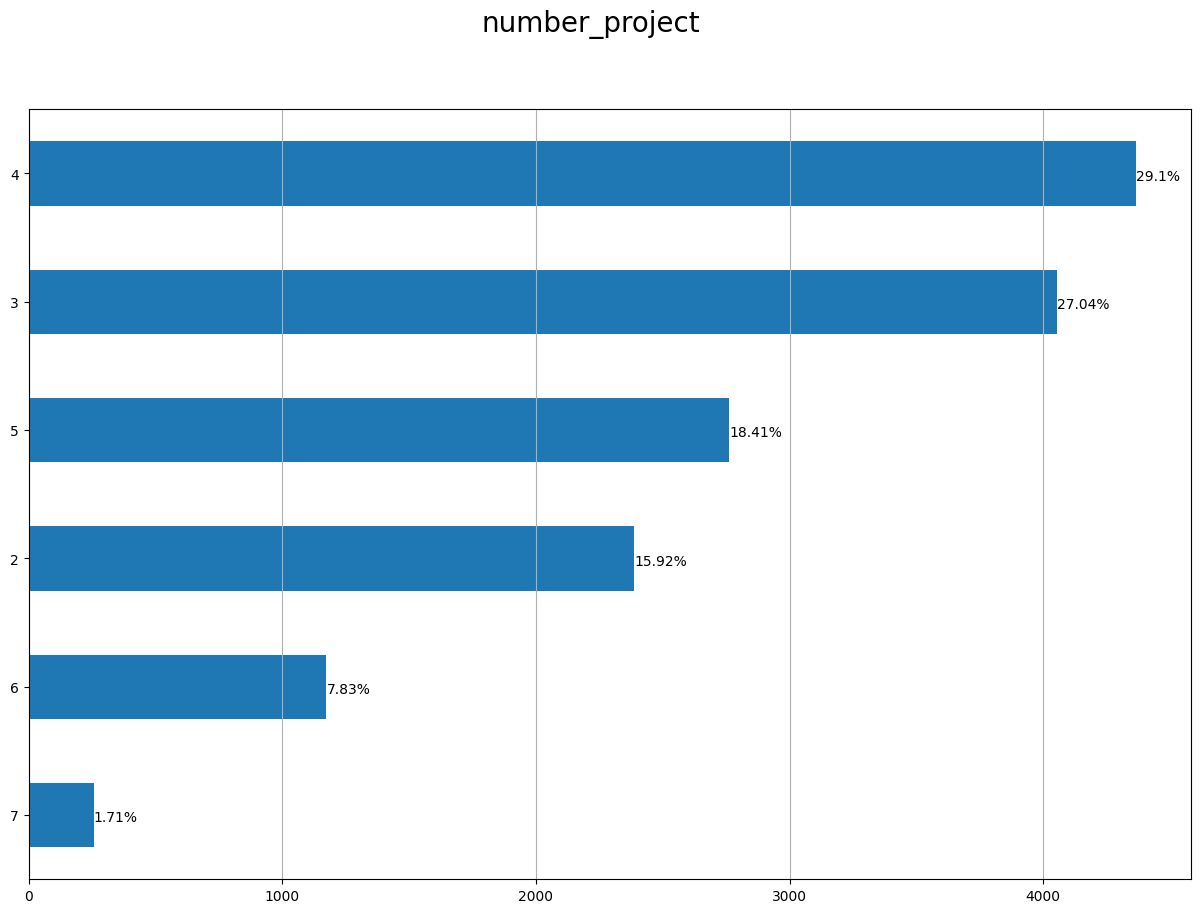

In [10]:
#Plotting categorical variables
freqdist_plot(df, "number_project", figsize=(15,10))

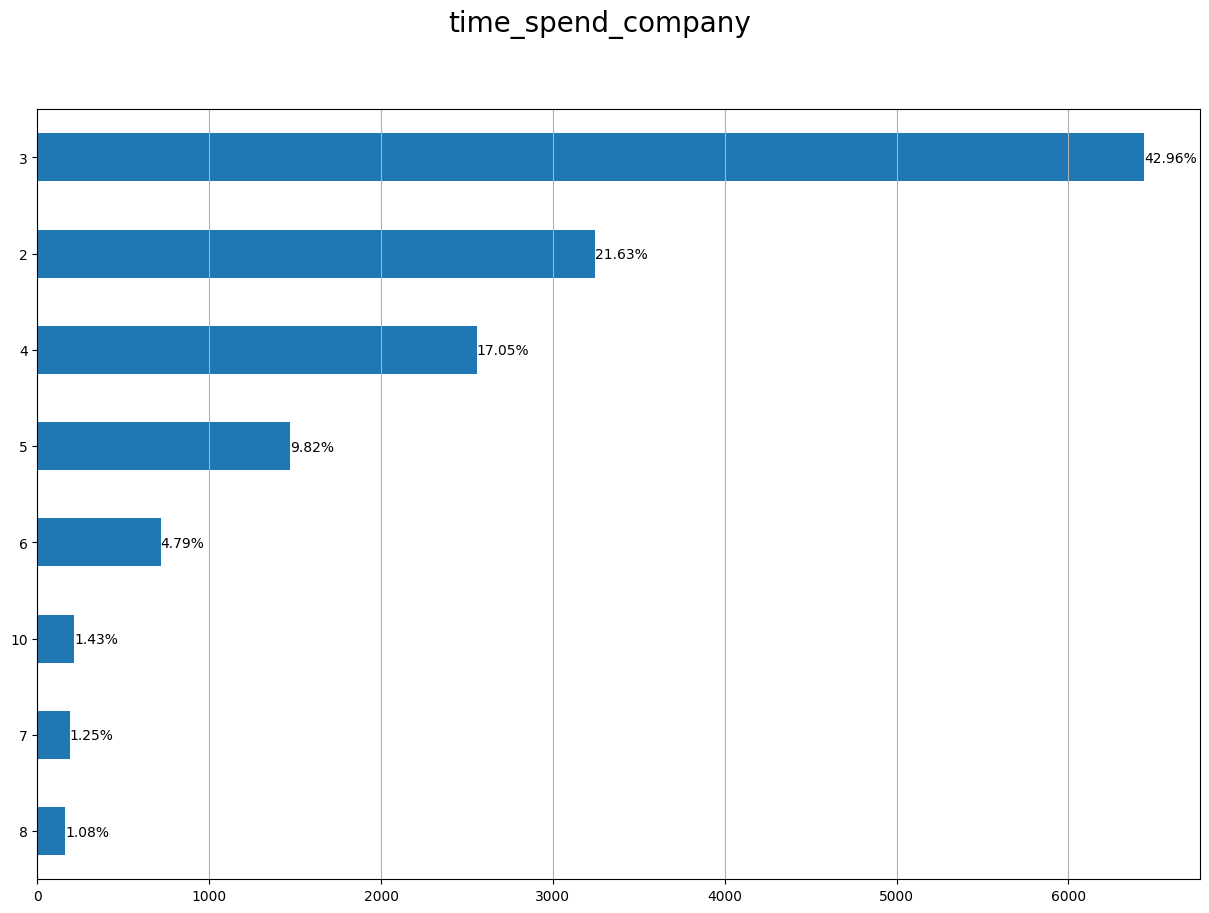

In [11]:
#Plotting categorical variables
freqdist_plot(df, "time_spend_company", figsize=(15,10))

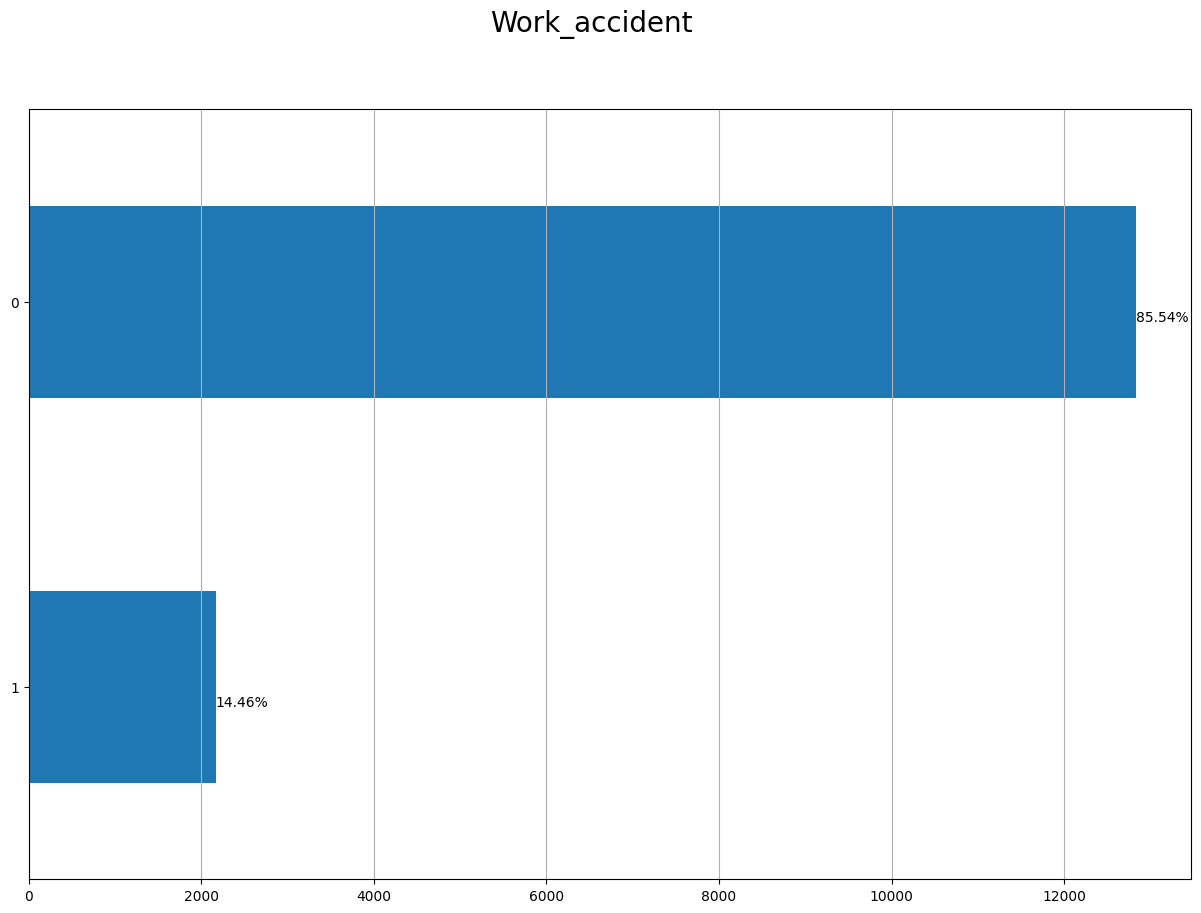

In [12]:
#Plotting categorical variables
freqdist_plot(df, "Work_accident", figsize=(15,10))

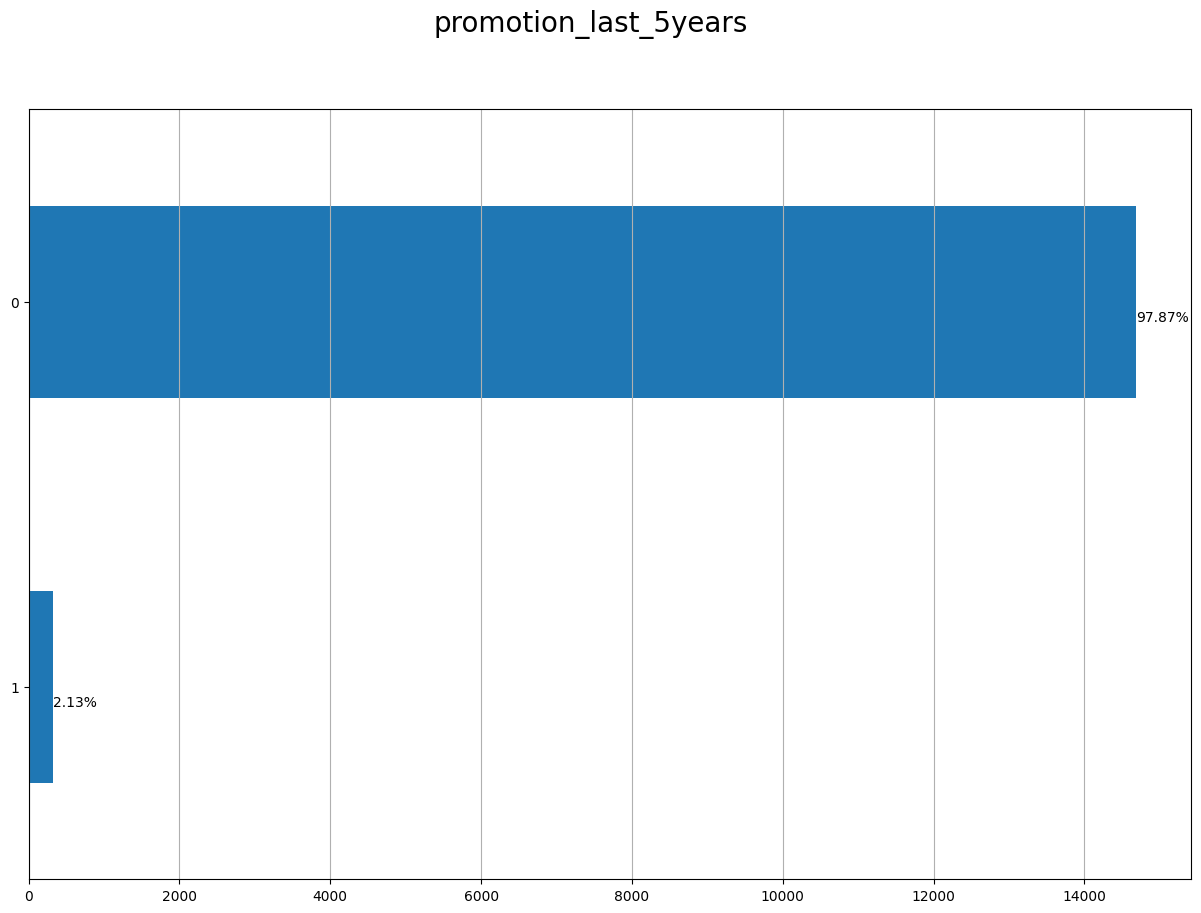

In [13]:
#Plotting categorical variables
freqdist_plot(df, "promotion_last_5years", figsize=(15,10))

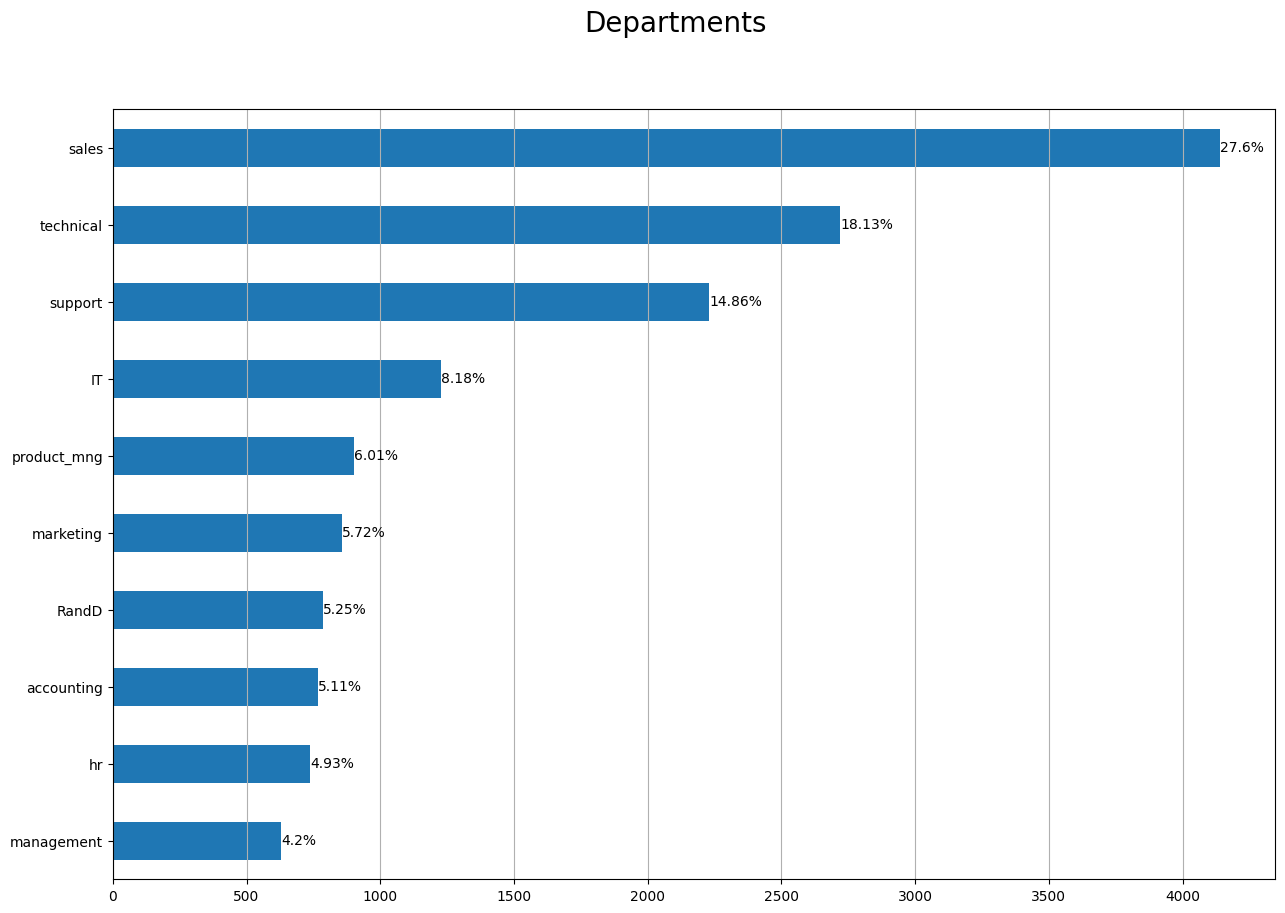

In [14]:
#Plotting categorical variables
freqdist_plot(df, "Departments", figsize=(15,10))

<AxesSubplot: >

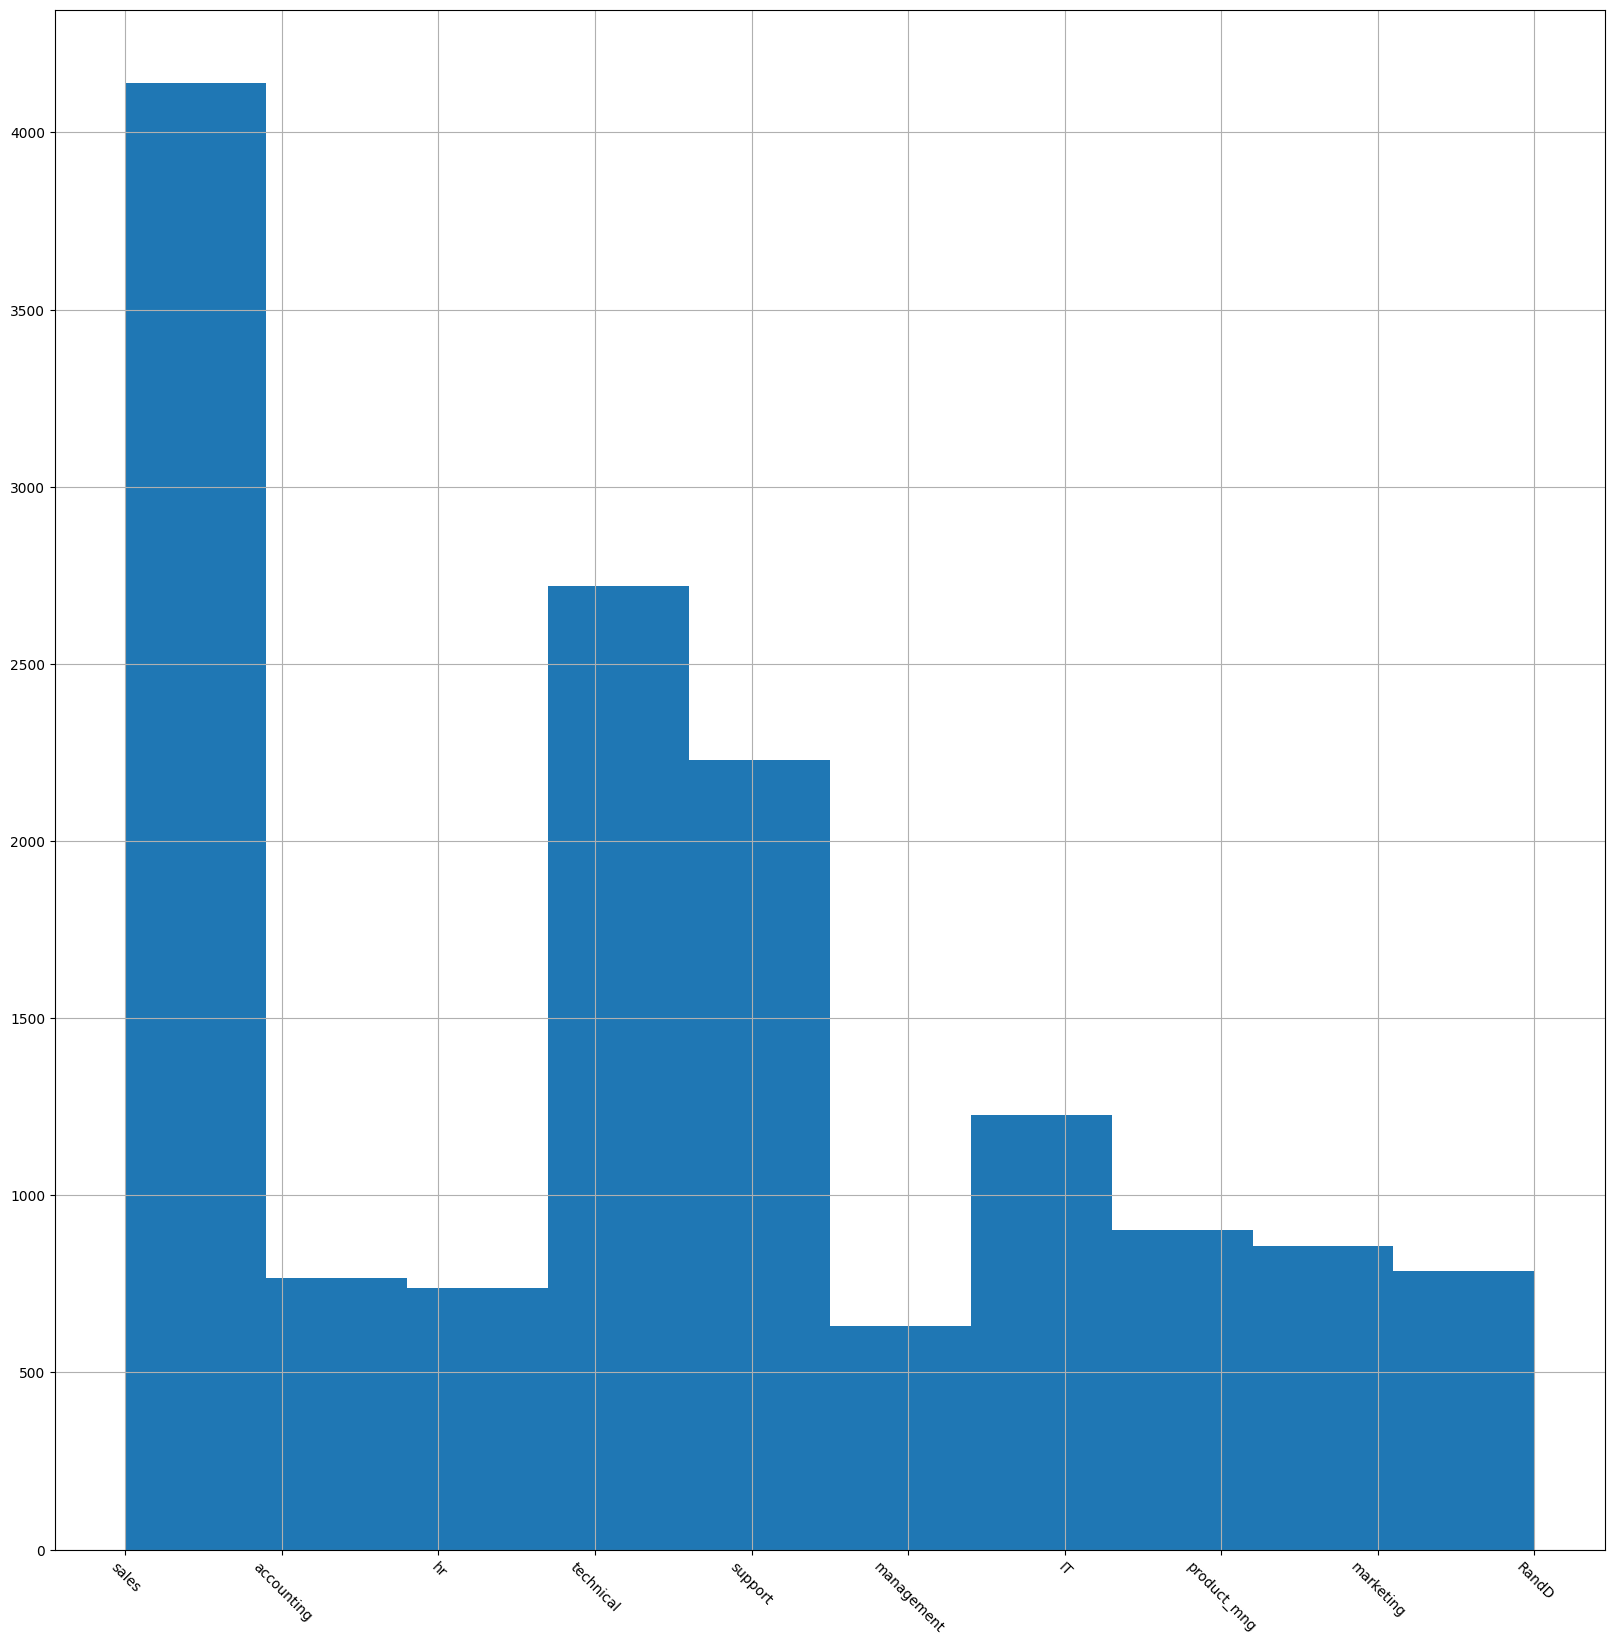

In [15]:
#Create hist of Dep
df["Departments"].hist(figsize=(20,20), xrot=-45)

NB! Here are some things to look out for when looking at categorical variabels:
       - Sparse classes. Can potentially cause the model to overfit. Should be combined if possible in Feature Engineering process.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- WARNING: Factorizing 10 labels of Departments ---
--- WARNING: Factorizing 3 labels of salary ---


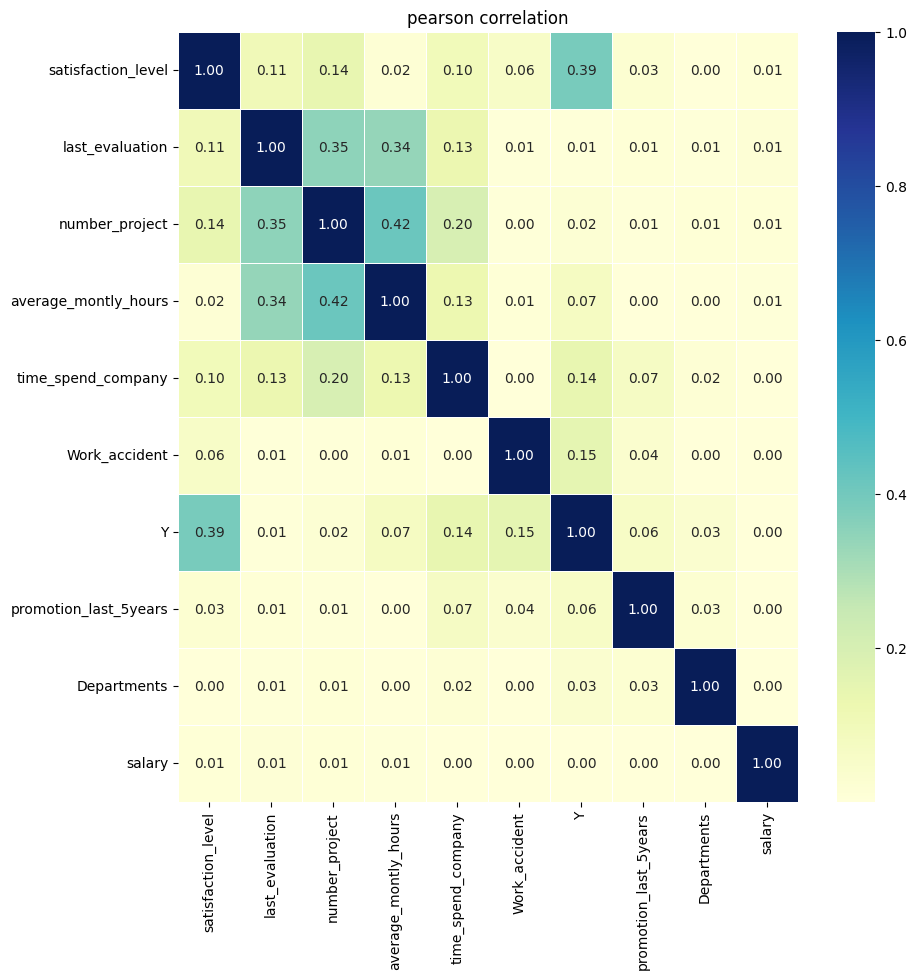

In [16]:
#Finding correlation with num var and Y
%load_ext autoreload
from functions import corr_matrix
%autoreload 2
corr = corr_matrix(df, method="pearson", negative=False, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


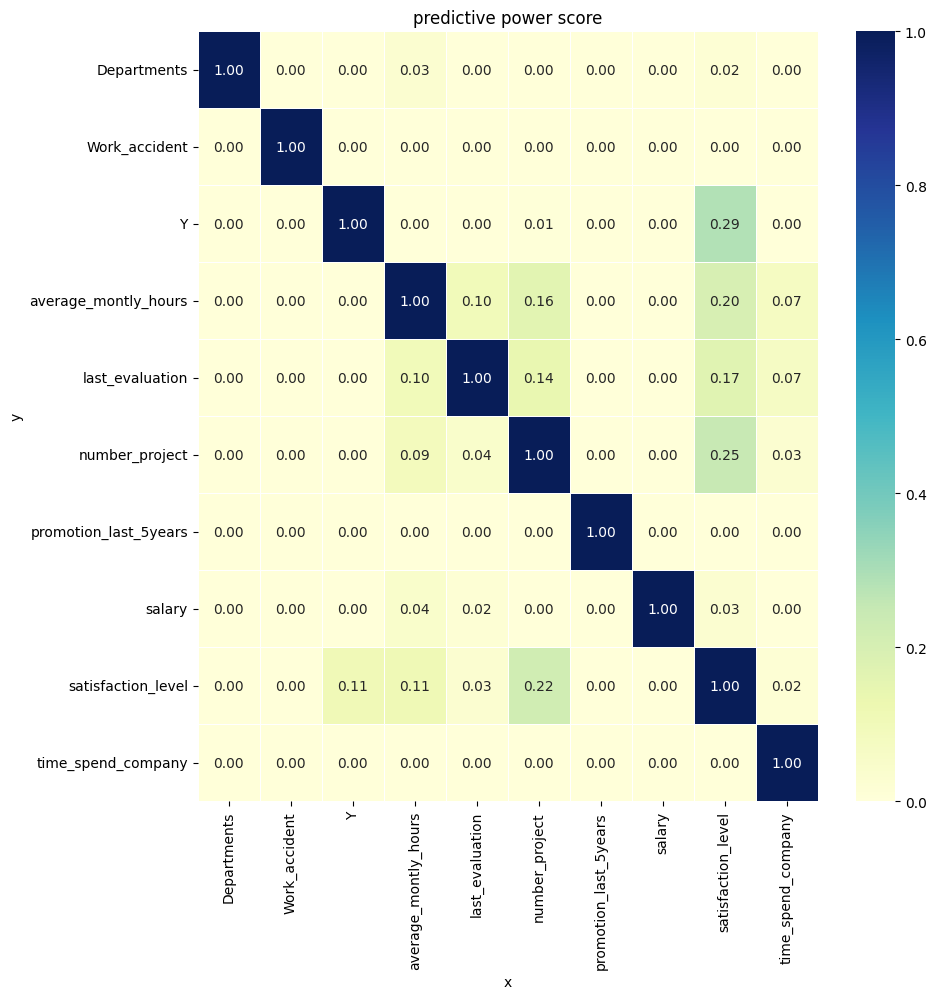

In [17]:
#Finding predictiv score between num and Y
%load_ext autoreload
from functions import pps_matrix
%autoreload 2
pps = pps_matrix(dtf = df, figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\jg\code\templat_reg_and_class\code\functions.py:190: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
C:\Users\jg\code\templat_reg_and_class\code\functions.py:190: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf[dtf[

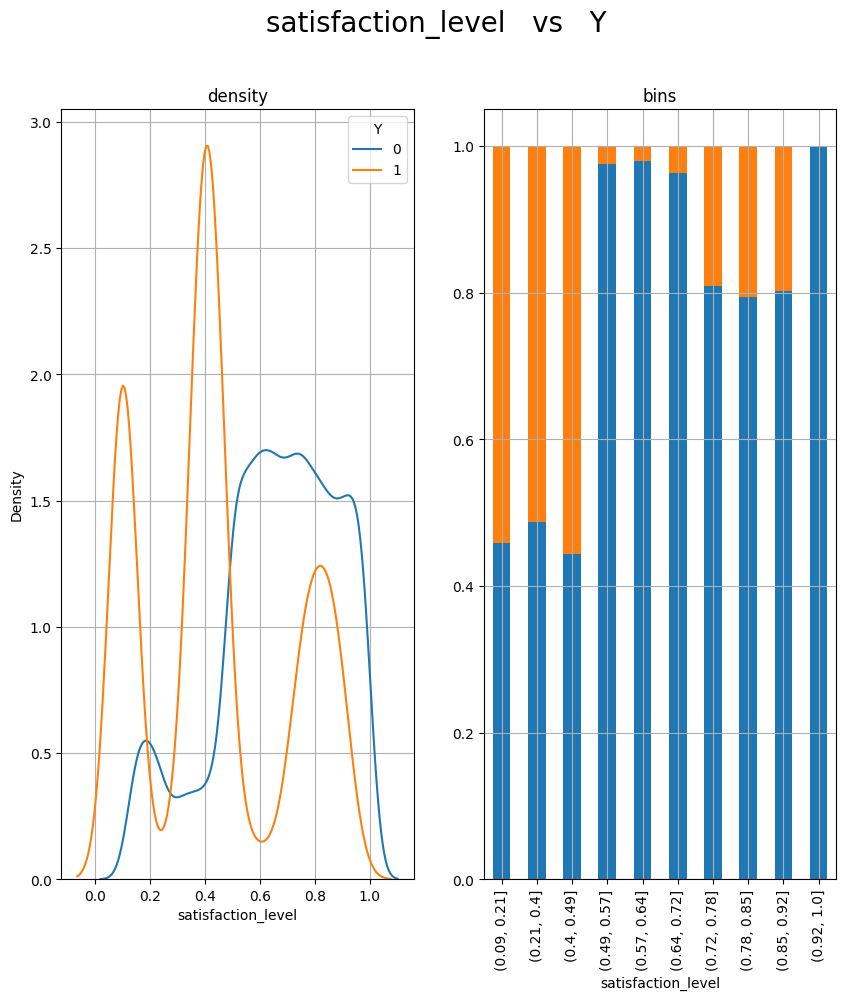

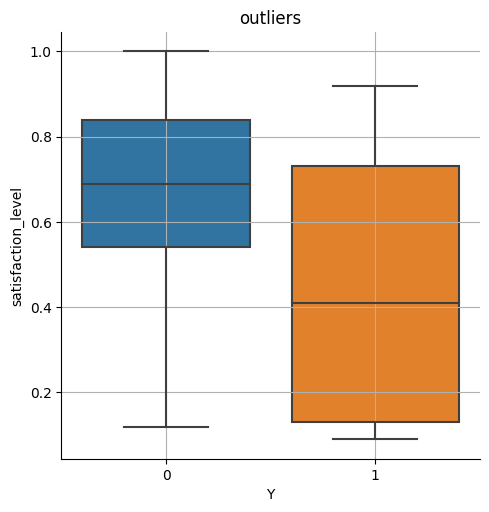

In [18]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="satisfaction_level", y="Y", figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


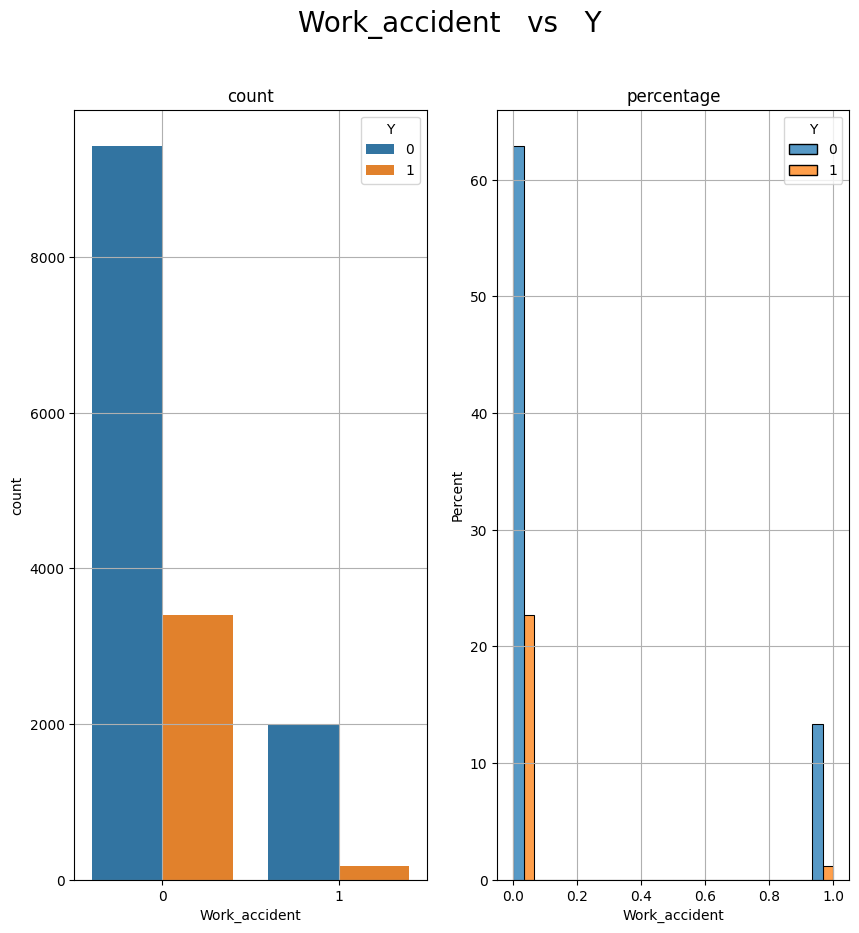

In [19]:
#Analysing highest corr with Y - satisfaction_level
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="Work_accident", y="Y", figsize=(10,10))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


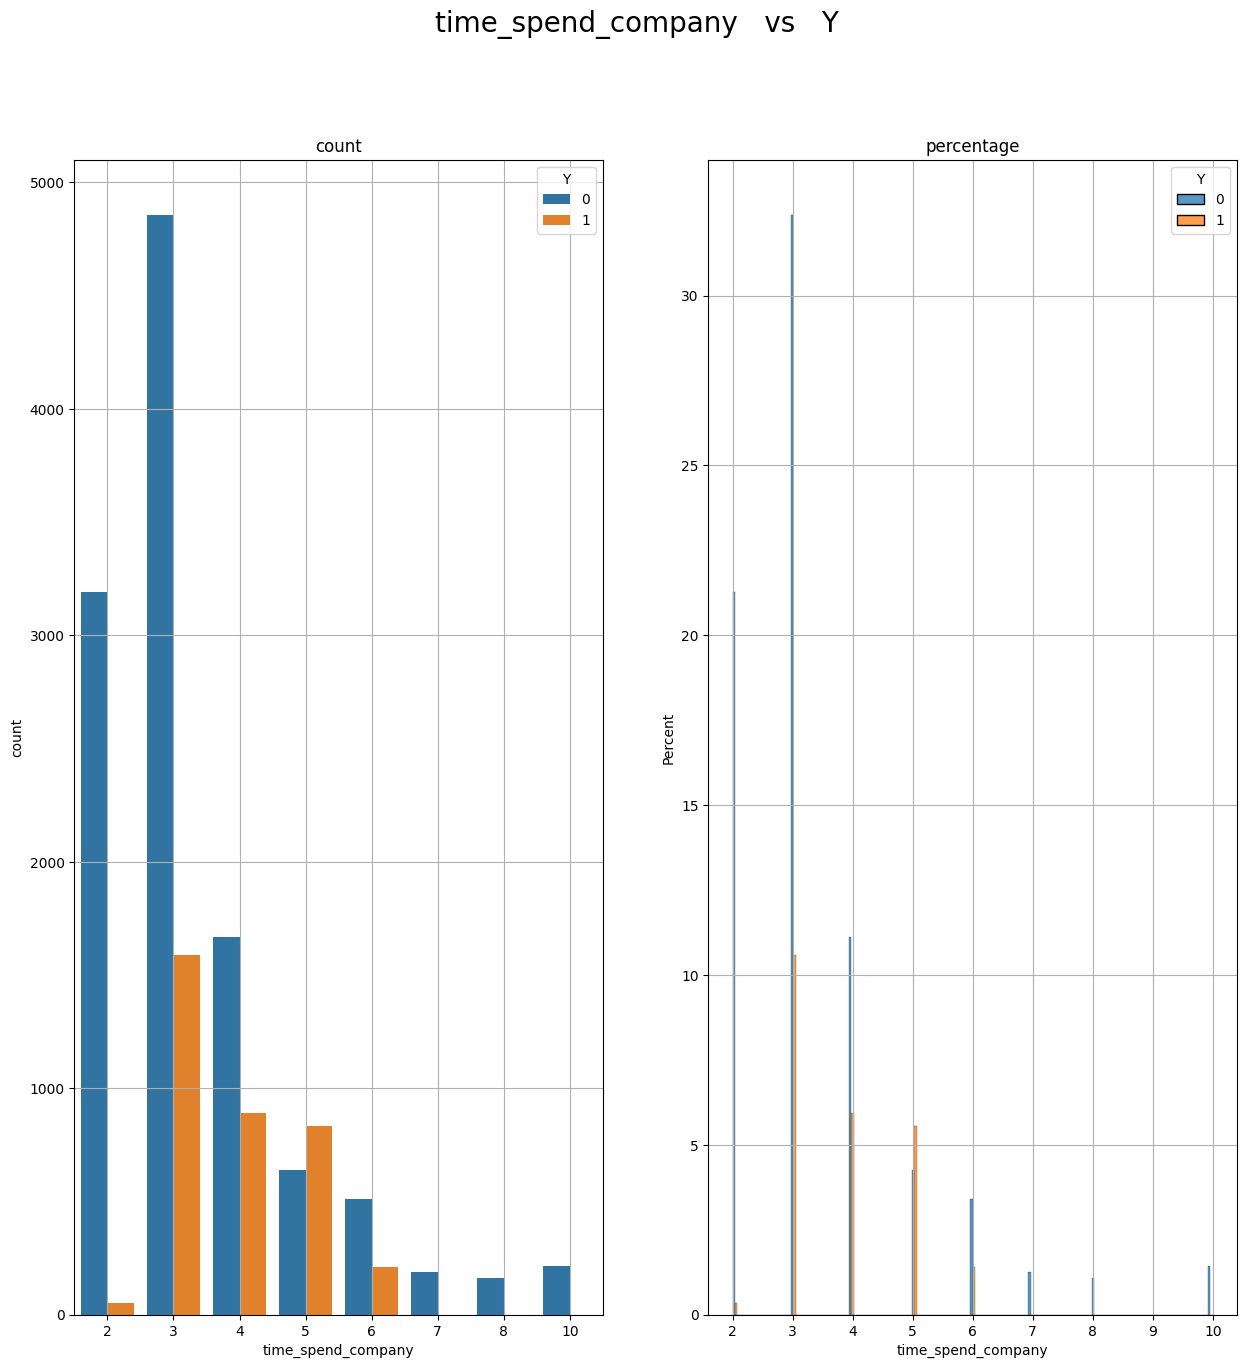

In [20]:
#Analysing highest corr with Y - time_spend_company
%load_ext autoreload
from functions import bivariate_plot
%autoreload 2
bivariate_plot(df, x="time_spend_company", y="Y", figsize=(15,15))

## Data Cleaning

__Remove Unwanted Observations__:
- Duplicate observations
- Irrelevant observation

__Fix Structural Errors__:
- Typos and inconsistent capitalization

__Filter Unwanted Outliers__:
- Innocent until proven guilty

__Handle missing data__:
- Catgorical data gets label "Missing!"
- Numerical gets flagged with a dummy variabel and then filled with 0.

In [21]:
#Checking for duplicates
sum(df.duplicated() == True)

#Selecting duplicated rows except first occurence based on all columns
duplicate = df[df.duplicated()]
print(duplicate)

#There are 3008 duplicates, dropping them
df = df.drop_duplicates()
print("New number of observations: ", df.shape[0])

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  Y  \
396                     139                   3              0  1   
866                     128                   3              0  1   
1317                    127                   3 

## Feature Engineering

__Create Intercation Features__:
- Combine two or more features

__Combine Sparse Classes__:
- Sparse classes (in categorical features) are those that have very few total observations.
- Rule of thumb: Combine untl each has at least 50 observations.

__Add Dummy Variables__:
- Create dummy/indicator variables for categorical features.

__Remove Unused Features__:
- Unused in this contex means:
1) ID columns
2) Features that wouldent be available at the time of prediction
3) Other text descriptions

In [22]:
#Counting values in number_project - no one have less than 50 points
df.Departments.value_counts()

#Merging IT and techincal
df.Departments.replace(["technical"],"IT", inplace=True)
df.Departments.value_counts()

C:\Users\jg\AppData\Local\Temp\ipykernel_15556\1560610219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Departments.replace(["technical"],"IT", inplace=True)


sales          3239
IT             3220
support        1821
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Departments, dtype: int64

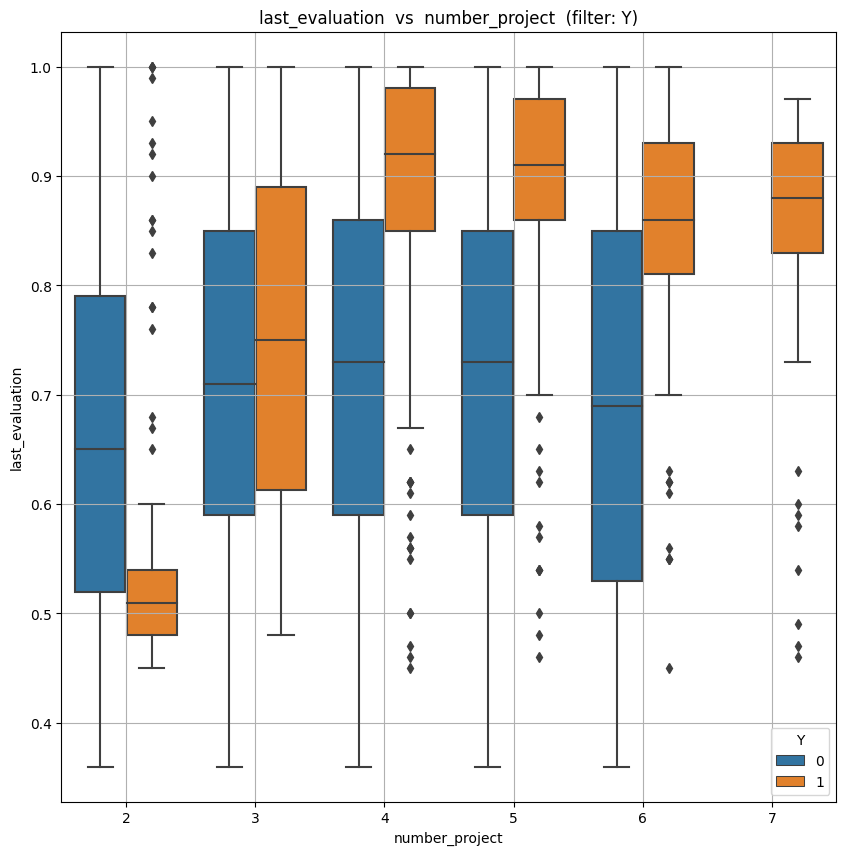

In [23]:
#Looking last_evaluation vs number_project
from functions import cross_distributions
cross_distributions(df, x1="last_evaluation", x2="number_project", y="Y", figsize=(10,10))

In [24]:
#Mergin number_project 2->3, 4->5, 6->7
df.number_project.replace([2],3, inplace=True)
df.number_project.replace([4],5, inplace=True)
df.number_project.replace([6],7, inplace=True)
df.number_project.value_counts()

C:\Users\jg\AppData\Local\Temp\ipykernel_15556\966566547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.number_project.replace([2],3, inplace=True)
C:\Users\jg\AppData\Local\Temp\ipykernel_15556\966566547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.number_project.replace([4],5, inplace=True)
C:\Users\jg\AppData\Local\Temp\ipykernel_15556\966566547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.number_project.

5    5918
3    5102
7     971
Name: number_project, dtype: int64

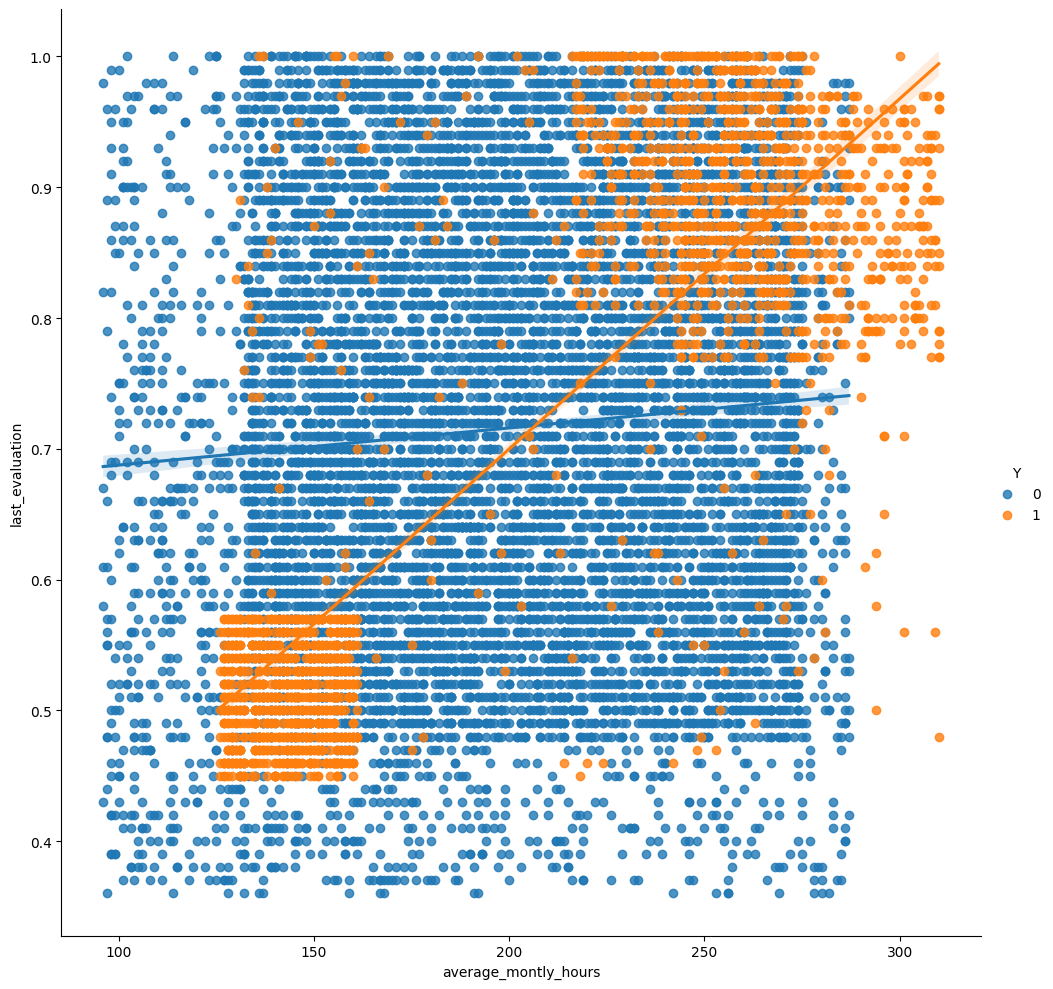

In [25]:
#Check scatterplot of average_montly_hours and last_evaluation"
cross_distributions(df, x1="average_montly_hours", x2="last_evaluation", y="Y", figsize=(10,10))

In [26]:
#Create new variable hard worker
df["hard_worker"] = ((df.average_montly_hours >= 200) & (df.last_evaluation >= 0.75)).astype(int)

#Remove average_montly_hours and last_evaluation
df = df.drop(columns = ["average_montly_hours", "last_evaluation"])
df

C:\Users\jg\AppData\Local\Temp\ipykernel_15556\707552276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hard_worker"] = ((df.average_montly_hours >= 200) & (df.last_evaluation >= 0.75)).astype(int)


,satisfaction_level,number_project,time_spend_company,Work_accident,Y,promotion_last_5years,Departments,salary,hard_worker
0,0.38,3,3,0,1,0,sales,low,0
1,0.80,5,6,0,1,0,sales,medium,1
2,0.11,7,4,0,1,0,sales,medium,1
3,0.72,5,5,0,1,0,sales,low,1
4,0.37,3,3,0,1,0,sales,low,0
...,...,...,...,...,...,...,...,...,...
11995,0.90,3,10,1,0,1,management,high,0
11996,0.74,5,10,0,0,1,management,high,1
11997,0.85,3,10,0,0,1,management,high,0
11998,0.33,3,10,0,0,1,marketing,high,0


In [27]:
#Create dummy variables
df = pd.get_dummies(df, columns = ["number_project","time_spend_company", "Departments", "salary" ])
df

,satisfaction_level,Work_accident,Y,promotion_last_5years,hard_worker,number_project_3,number_project_5,number_project_7,time_spend_company_2,time_spend_company_3,...,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,salary_high,salary_low,salary_medium
0,0.38,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11996,0.74,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11997,0.85,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11998,0.33,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [28]:
#Change name of columns
df = df.rename(columns={'number_project_3': 'under_up_to_3_projects', 'number_project_5' : 'over3_up_to_5_projects',"number_project_7" : 'over_5_projects'})
df

,satisfaction_level,Work_accident,Y,promotion_last_5years,hard_worker,under_up_to_3_projects,over3_up_to_5_projects,over_5_projects,time_spend_company_2,time_spend_company_3,...,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,salary_high,salary_low,salary_medium
0,0.38,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11996,0.74,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11997,0.85,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11998,0.33,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Algorithm Selection

The most effective algorithms typically offer a combination of regularization, automatic feature selection,
ability to express nonlinear relationships, and/or ensembling. Those algorithms include:
- Logistic regression (L1 and L2 regularised)
- Random Forest
- Gradient-boosted tree

## Model Training
__Split into Train/test__:
- Split data into train and test data

__Fit and Tune models__:
- Use cross validation to find the best set of hyperparameters for each model.

__Evalute each model__:
- Which model had the best performance on the test set? (performance)
- Does it perform well across various performance metrics? (robustness)
- Did it also have (one of) the best cross-validated scores from the training set? (consistency)
- Does it solve the original business problem? (win condition)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

#Split into X and y
y = df.Y
X = df.drop("Y", axis= 1)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

#Create baseline model
lr = LogisticRegression()

#Define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#Use k-fold CV to evaluate model
scores = cross_val_score(lr, X_train, y_train,
                         cv=cv, n_jobs=-1)
print("Mean score from baseline model :", np.mean(scores))

#Define pipline for training
pipelines = {
    'l1': make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l1',solver='liblinear', random_state=123)),
    'l2': make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=123)),
    'rf': make_pipeline(
        RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(
        GradientBoostingClassifier(random_state=123))
}


#Define hyperparameters that needs to be tuned in models
#Logistic Reg
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01,
                                                 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
l2_hyperparameters = {'logisticregression__C' :[0.001, 0.005, 0.01, 0.05, 0.1, 0.5,1, 5, 10, 50, 100, 500, 1000]}

#RF
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
}

#Gb
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}


#Put every estimator in a dic
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

fitted_models = {}
for name, pipeline in pipelines.items():
       model = GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
       model.fit(X_train, y_train)
       fitted_models[name] = model

Mean score from baseline model : 0.8398669403892945


In [30]:
#Evaluating training score
for name, model in fitted_models.items():
    print(name)
    print(" — — — — ")
    print("Best score : ", model.best_score_ )
    print("Best hyper params :", model.best_params_)
    print()

print("Linreg/Baseline")
print(" — — — — ")
print("Mean score  :", np.mean(scores))

l1
 — — — — 
Best score :  0.8559215328467152
Best hyper params : {'logisticregression__C': 0.005}

l2
 — — — — 
Best score :  0.862490115571776
Best hyper params : {'logisticregression__C': 0.001}

rf
 — — — — 
Best score :  0.9751880213764338
Best hyper params : {'randomforestclassifier__max_features': 0.33, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 100}

gb
 — — — — 
Best score :  0.9745625868960724
Best hyper params : {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 200}

Linreg/Baseline
 — — — — 
Mean score  : 0.8398669403892945


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Results for : l1
Accuracy: 0.8511879949979158
Precision: 0.6305732484076433
Recall: 0.24874371859296482
F1: 0.3567567567567568


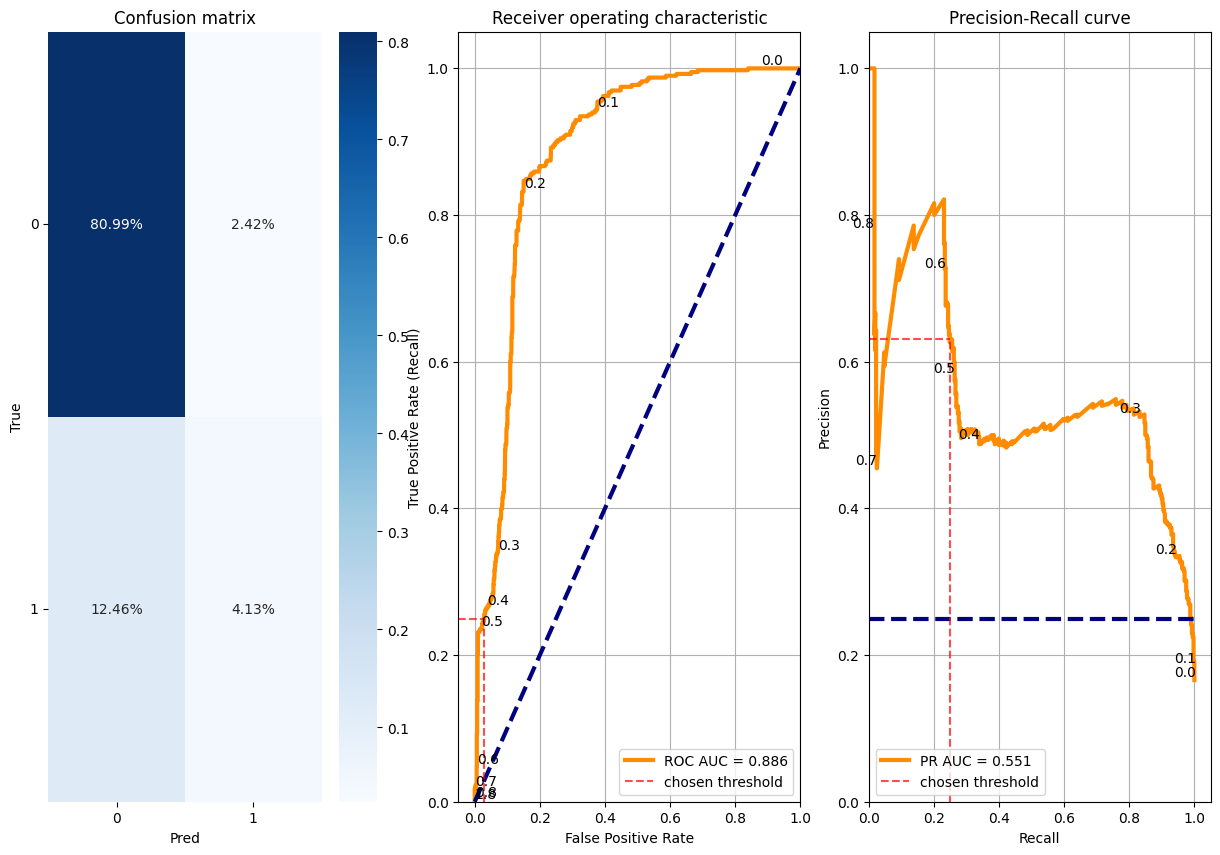

In [82]:
#Results for L1
#Resetting index on y_test
y_test_arr = y_test.reset_index(drop=True)

#Evaluating models on test set
%load_ext autoreload
from functions import evaluate_classif_model
%autoreload 2

evaluate_classif_model(y_test = y_test_arr, models_from_train= fitted_models,name_of_model="l1", X_test = X_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Results for : l2
Accuracy: 0.8599416423509796
Precision: 0.7627118644067796
Recall: 0.22613065326633167
F1: 0.3488372093023256


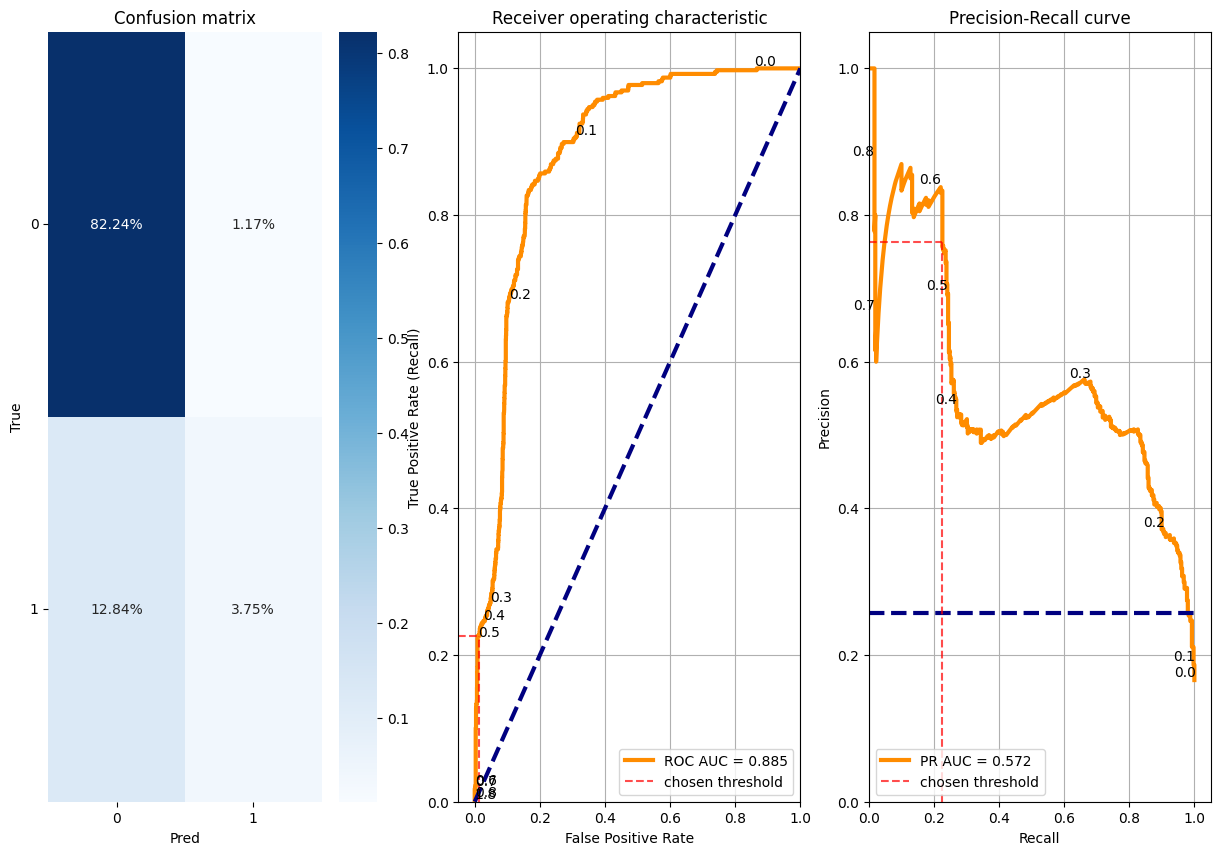

In [83]:
#Results for L2
#Resetting index on y_test
y_test_arr = y_test.reset_index(drop=True)

#Evaluating models on test set
%load_ext autoreload
from functions import evaluate_classif_model
%autoreload 2

evaluate_classif_model(y_test = y_test_arr, models_from_train= fitted_models,name_of_model="l2", X_test = X_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Results for : rf
Accuracy: 0.9720716965402251
Precision: 0.9321148825065274
Recall: 0.8969849246231156
F1: 0.914212548015365


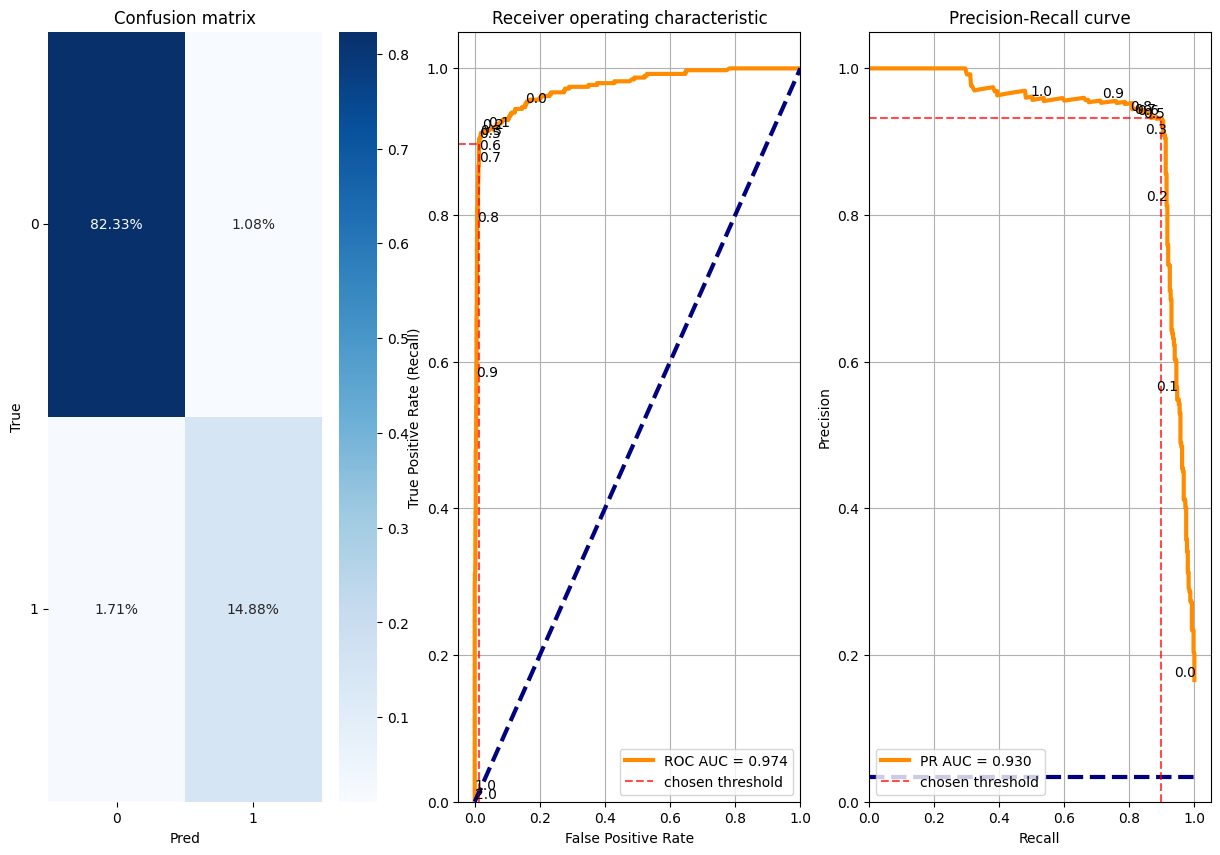

In [84]:
#Results for RF
#Resetting index on y_test
y_test_arr = y_test.reset_index(drop=True)

#Evaluating models on test set
%load_ext autoreload
from functions import evaluate_classif_model
%autoreload 2

evaluate_classif_model(y_test = y_test_arr, models_from_train= fitted_models,name_of_model="rf", X_test = X_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Results for : gb
Accuracy: 0.9704043351396415
Precision: 0.9268929503916449
Recall: 0.8919597989949749
F1: 0.9090909090909092


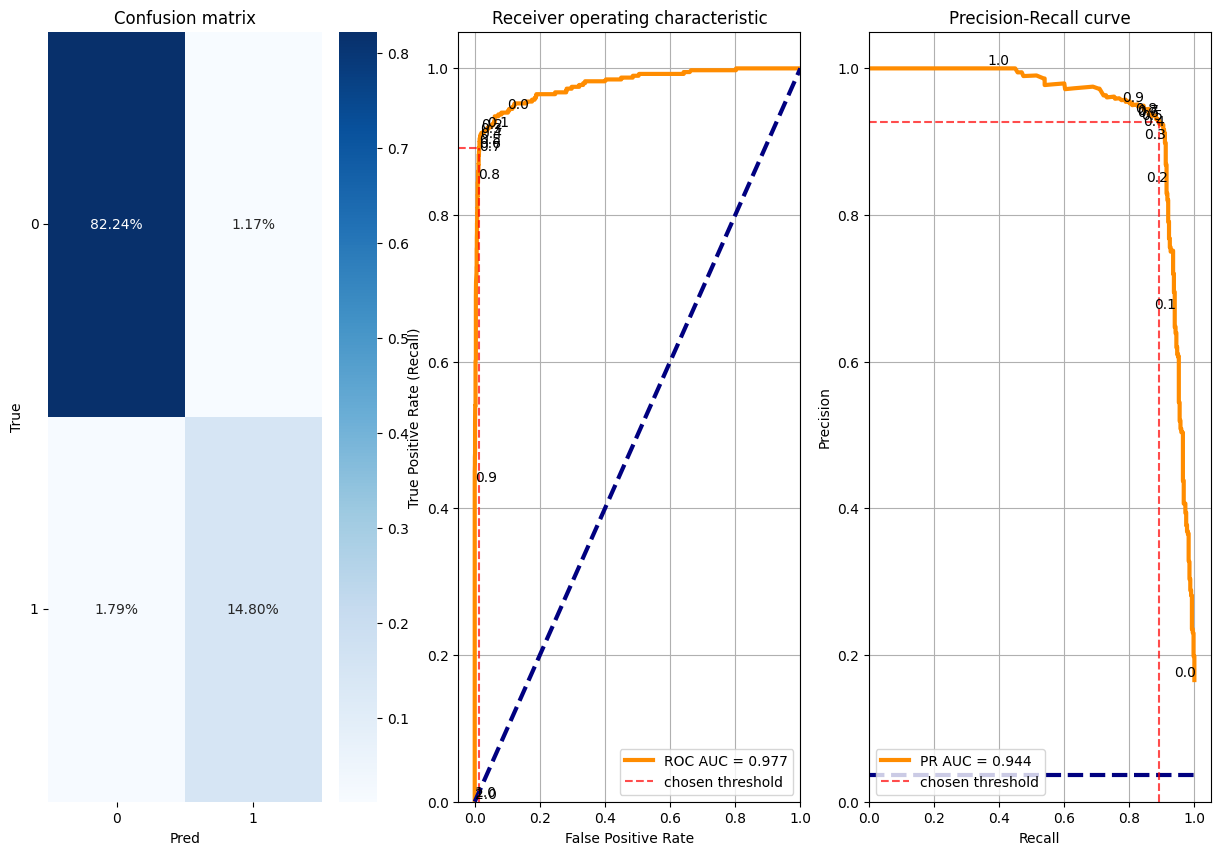

In [85]:
#Results for GB
#Resetting index on y_test
y_test_arr = y_test.reset_index(drop=True)

#Evaluating models on test set
%load_ext autoreload
from functions import evaluate_classif_model
%autoreload 2

evaluate_classif_model(y_test = y_test_arr, models_from_train= fitted_models,name_of_model="gb", X_test = X_test)

--- model used ---
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200)


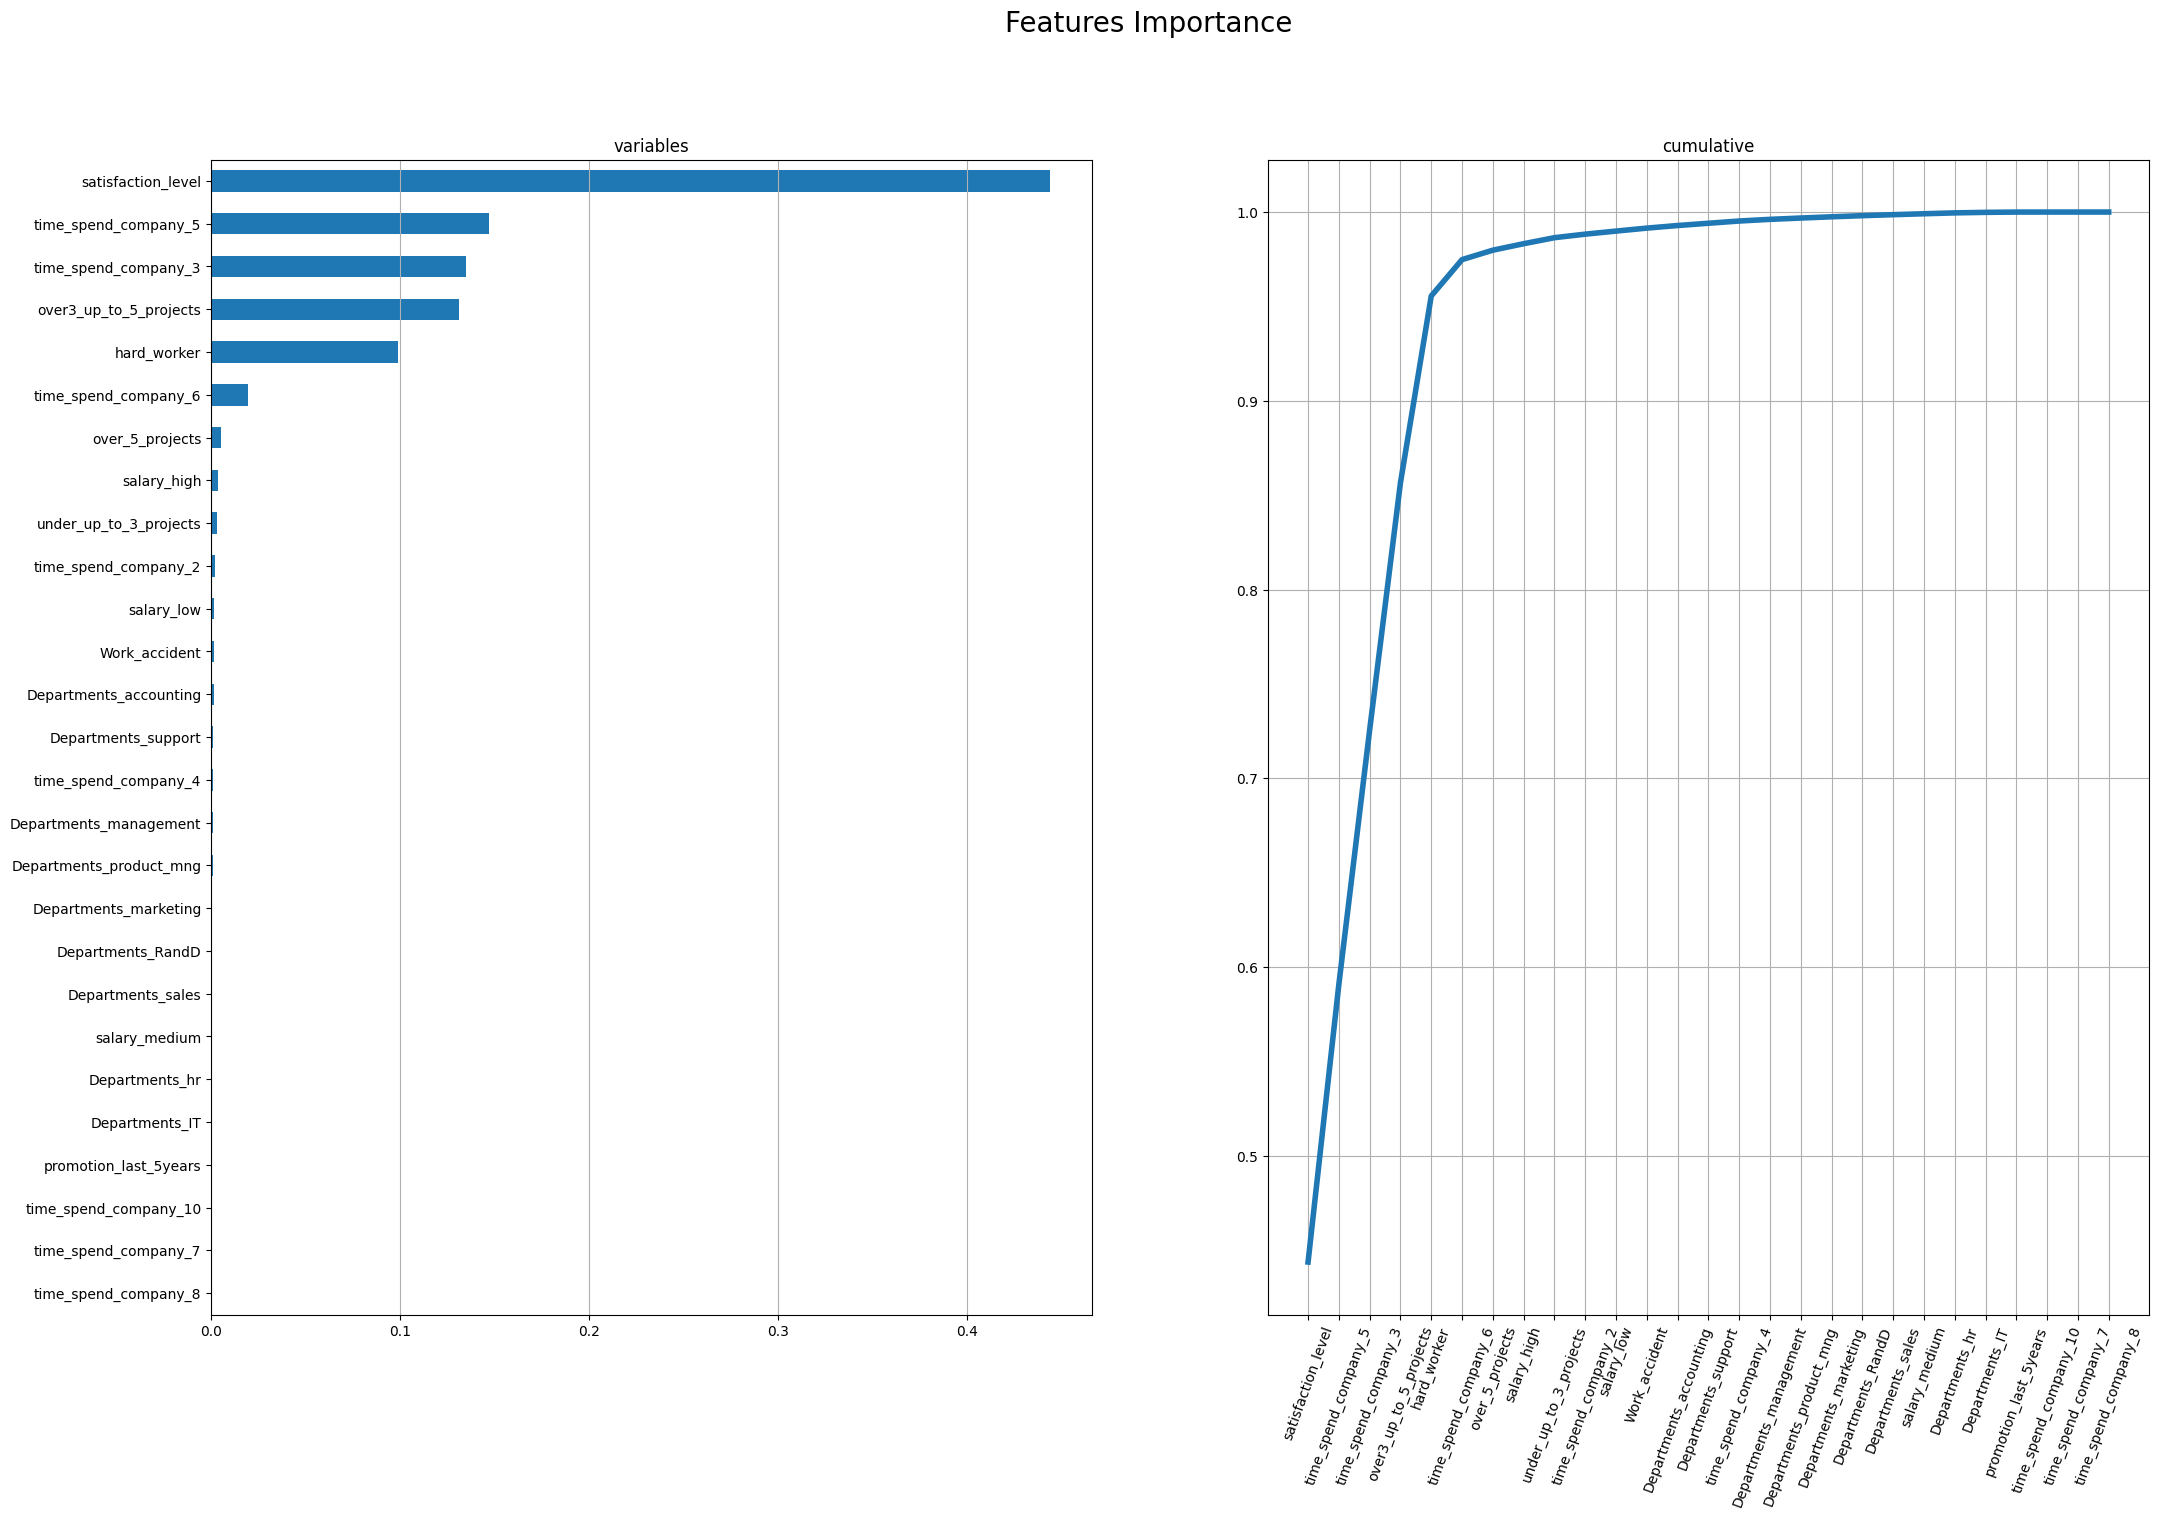

,VARIABLE,IMPORTANCE,cumsum
0,satisfaction_level,0.443836,0.443836
1,time_spend_company_5,0.147107,0.590943
2,time_spend_company_3,0.134716,0.725659
3,over3_up_to_5_projects,0.130948,0.856607
4,hard_worker,0.098917,0.955524
5,time_spend_company_6,0.019282,0.974807
6,over_5_projects,0.004986,0.979792
7,salary_high,0.003425,0.983217
8,under_up_to_3_projects,0.003192,0.986409
9,time_spend_company_2,0.001878,0.988287


In [91]:
#Get Feature importance from strongest model - RF
from functions import features_importance
model = GradientBoostingClassifier(learning_rate =0.05, max_depth = 5, n_estimators = 200)
model.fit(X_train,y_train)
features_importance(X_train,y_train,X_names= X_train.columns.tolist(),model = model, task="classification", figsize=(25,15) )

In [141]:
#Upsampling Y and tuning hyper parameters for best model
from functions import rebalance
from functions import tune_classif_model
df_up = rebalance(df,"Y", balance="up")

#Split into X and y
y = df_up.Y
X = df_up.drop("Y", axis= 1)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Define pipline for training
pipelines = {
    'rf': make_pipeline(
        RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(
        GradientBoostingClassifier(random_state=123))
}


#Define hyperparameters that needs to be tuned in models
#RF
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
}

#Gb
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}


#Put every estimator in a dic
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hyperparameters[name],cv=10,n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

--- situation ---
       Y      %
0  10000  83.4%
1   1991  16.6%
tot: 11991
--- upsampling ---
   randomly replicate observations from the minority class (Overfitting risk)
--- new situation ---
       Y      %
0  10000  50.0%
1  10000  50.0%
tot: 20000



KeyboardInterrupt

